<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 3</center></b><h2>
<h3><b><center>Tensor de esfuerzos y deformación</center></b><h3>
<h5><center><b>Asignada</b>: 2 de Abril de 2024</center><h5>
<h5><center><b>Entrega</b>: 16 de Abril de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>:
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner en práctica con un problema práctico algunos de los temas vistos sobre el tensor de esfuerzos y el tensor de deformación.

**Procedimiento**:

Un bloque metálico de 2 metros por 1 metro, con 0.2 metros de espesor, esta sometido a un campo de desplazamientos dado por la siguiente expresión:

  $$
  \begin{array}{ll}
x & =X+0.001 Y+0.0002 X^2 - 0.002 Z \\
y & =1.001 Y-0.0002 Y^2 + 0.004 Z \\
z& = 0.0003 X^2 + 0.0004 Y + 0.998 Z
\end{array}
  $$

1. Hacer un mapa de campo vectorial mostrando los vectores de desplazamiento $\vec u$ en la lamina. Es decir, sobre una malla de valores de las coordenadas eulerianas $X, Y$ dibujar el valor del vector de desplazamiento proyectado sobre ese plano $(u_x, u_y)$ para un valor de z específico. Crear un código interactivo que permita, variando el valor de $z$, ver el campo de desplazamientos en la lámina. Hacer lo mismo para cortes en el plano $X-Z$ y $Y-Z$.

2. Calcular el campo tensorial de deformaciones (pequeñas) dentro de la lámina, $u_{ij}$ como función de $\vec X$. Si se diagonaliza el tensor de deformaciones, es posible encontrar en cada punto las denominadas deformaciones principales (autovalores del tensor), $\epsilon_1, \epsilon_2, \epsilon_3$ (de menor a mayor de acuerdo con su valor absoluto) y las direcciones principales de deformación (autovectores normalizados), $\hat e_{u1}, \hat e_{u2}, \hat e_{u3}$. Escriba un código interactivo que permita variar el valor de $X, Y, Z$ y que muestre, en un gráfico en 3-D, las direcciones principales de deformación (son 3 vectores ortogonales) en ese punto de la lámina, de modo que el tamaño de cada vector sea proporcional al valor absoluto de la deformación principal correspondiente. Juegue con el código y comente lo que observa.

3. Consulte el módulo de Young $E$ y el coeficiente de Poisson del Aluminio $\nu$ y, usando la ley de Hooke (relación constitutiva), calcule el tensor de esfuerzos en cada punto del bloque (campo tensorial de esfuerzos) y la presión (campo escalar de presión). Ambos campos deben escribirse como función de $X, Y, Z$. Haga un interactivo en el que muestre, variando el valor de z, un gráfico de contornos (o mapa de calor) de la presión experimentada a cada profundidad dentro del bloque. ¿En que punto del bloque se experimenta la máxima presión y cuánto vale?.

4. Calcule el tensor de esfuerzos en el centro del bloque. Diagonalizando el tensor, determine los esfuerzos principales (autovalores del tensor), $\sigma_1, \sigma_2, \sigma_3$ y las direcciones de los esfuerzos principales (autovectores del tensor normalizados) $\hat e_{\sigma1}, \hat e_{\sigma2}, \hat e_{\sigma3}$. Ahora aplique una rotación del tensor de esfuerzos en ese punto y demuestre que el tensor rotado tiene forma diagonal. Repita el procedimiento de rotación a todos los puntos del bloque y usando esos tensores de esfuerzos rotados, repita 3 (mapas de calor de la presión en el bloque y lugar donde la presión es más grande).

5. Determine el valor del vector de esfuerzo normal (tracción sobre la cara, $\vec t_n = \mathbf{\sigma}\cdot\hat n$) que experimenta el bloque en cada una de sus 6 caras y el esfuerzo normal correspondiente ($\sigma_n = \vec t_n\cdot\hat n$). Haga gráficos de contorno (mapas de calor) para el valor del esfuerzo normal en cada uno de los puntos de esas caras. Comente su resultado.  Calcule también el valor del vector de esfuerzo de cizalladura en cada una de las 3 caras ($\vec\tau_n = \vec t_n - \sigma_n\hat n$) y haga mapas de campo vectorial de esos vectores en cada una de ellas.


**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos de cada punto.

- Datos mínimos:
  - Los números solicitados en cada punto.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

Instalación de Librerías 

In [1]:
!pip install -q ipywidgets

Importanción de librerías

In [2]:
import numpy as np
import sympy as sp

from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

import plotly.graph_objects as go

**Procedimiento**:

Un bloque metálico de 2 metros por 1 metro, con 0.2 metros de espesor, esta sometido a un campo de desplazamientos dado por la siguiente expresión:

  $$
  \begin{array}{ll}
x & =X+0.001 Y+0.0002 X^2 - 0.002 Z \\
y & =1.001 Y-0.0002 Y^2 + 0.004 Z \\
z& = 0.0003 X^2 + 0.0004 Y + 0.998 Z
\end{array}
  $$
  
1. Hacer un mapa de campo vectorial mostrando los vectores de desplazamiento $\vec u$ en la lamina. Es decir, sobre una malla de valores de las coordenadas eulerianas $X, Y$ dibujar el valor del vector de desplazamiento proyectado sobre ese plano $(u_x, u_y)$ para un valor de z específico. Crear un código interactivo que permita, variando el valor de $z$, ver el campo de desplazamientos en la lámina. Hacer lo mismo para cortes en el plano $X-Z$ y $Y-Z$.

Definamos las funciones de desplazamiento de nuestro problema a partir de las posiciones iniciales X, Y, Z

In [3]:
def displacement_x(X, Y, Z):
    """
    Calcula la componente final en x del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en x del desplazamiento.
    """
    return X + 0.001 * Y + 0.0002 * X**2 - 0.002 * Z

def displacement_y(_, Y, Z):
    """
    Calcula la componente final en y del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en y del desplazamiento.
    """
    return 1.001 * Y - 0.0002 * Y**2 + 0.004 * Z

def displacement_z(X, Y, Z):
    """
    Calcula la componente final en z del desplazamiento dado las coordenadas X, Y, Z.
    
    Parámetros:
    X (float): Coordenada en el eje X.
    Y (float): Coordenada en el eje Y.
    Z (float): Coordenada en el eje Z.
    
    Retorna:
    float: La componente final en z del desplazamiento.
    """
    return 0.0003 * X**2 + 0.0004 * Y + 0.998 * Z

Hagamos el gráfico interactivo para perfiles x, y en relación a la variación de z

In [4]:
@interact
def displacement_vector_z(Z_value = (0,0.2,0.01)):
  """
  Función que grafica el vector de desplazamiento en el plano XY para un valor de Z dado.

  Parámetros:
  Z_value (float): Valor de Z para el cual se quiere graficar el vector de desplazamiento.
  """
  X_range = np.linspace(0, 2, 7)  # Rango para X
  Y_range = np.linspace(0, 1, 7)  # Rango para Y
  X, Y = np.meshgrid(X_range, Y_range)  # Crear un mesgrid de puntos

  # Calculando los puntos finales del vector
  x = displacement_x(X, Y, Z_value) 
  y = displacement_y(X, Y, Z_value) 

  # Plot en el plano XY
  plt.figure(figsize=(10, 5))
  plt.quiver(X, Y, x - X, y - Y, angles='xy', scale_units='xy', scale=1, color='purple')
  plt.title(f'Vector de desplazamiento para Z={Z_value}[m] en el plano XY')
  plt.xlabel(r'$\hat{U}_x$ [m]')
  plt.ylabel(r'$\hat{U}_y$ [m]')
  plt.grid()
  plt.show()

interactive(children=(FloatSlider(value=0.1, description='Z_value', max=0.2, step=0.01), Output()), _dom_class…

Hagamos lo mismo para para cortes en el plano XZ

In [5]:
@interact
def displacement_vector_y(Y = (0,1,0.01)):
  """
  Función que grafica el vector de desplazamiento en el plano XZ para un valor de Y dado.
  
  Parámetros:
  Y (float): Valor de Y para el cual se quiere graficar el vector de desplazamiento.
  """
  X_range = np.linspace(0, 2, 7)  # Rango para X
  Z_range = np.linspace(0, 0.2, 7)  # Rango para Z
  X, Z = np.meshgrid(X_range, Z_range)  # Crear un mesgrid de puntos

  # Calculando los vectores iniciales
  x = displacement_x(X, Y, Z) 
  z = displacement_z(X, Y, Z) 

  # Plot para el plano XZ
  plt.figure(figsize=(10, 5))
  plt.quiver(X, Z, x - X, z - Z, angles='xy', scale_units='xy', scale=1, color='red')
  plt.title(f'Vector de desplazamiento para Y={Y}[m], en el plano XZ')
  plt.xlabel(r'$\hat{U}_x$ [m]')
  plt.ylabel(r'$\hat{U}_z$ [m]')
  plt.grid()
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='Y', max=1.0, step=0.01), Output()), _dom_classes=('w…

Al igual que para el plano x,y la dependecia del plano XZ de la coordenada Y es muy baja por tanto no se observa una variación en el gráfico

Ahora veamos la animación pero par el plano YZ

In [6]:
@interact
def displacement_vector_x(X = (0, 2, 0.01)):
    """
    Función que grafica el vector de desplazamiento en el plano YZ para un valor de X dado.

    Parámetros:
    X (float): Valor de X para el cual se quiere graficar el vector de desplazamiento.
    """
    Y_range = np.linspace(0, 1, 7)  # Rango para X
    Z_range = np.linspace(0, 0.2, 7)  # Rango para Z
    Y, Z = np.meshgrid(Y_range, Z_range)  # Crear un mesgrid de puntos

    # Calculando los puntos finales del vector
    y = displacement_y(X, Y, Z) 
    z = displacement_z(X, Y, Z) 

    # Plot para el mapa de vectores plano XZ
    plt.figure(figsize=(10, 5))
    plt.quiver(Y, Z, y - Y, z -Z, angles='xy', scale_units='xy', scale=1, color='blue')
    plt.title(f'Vector de desplazamiento para X={X}[m], en el plano YZ')
    plt.xlabel(r'$\hat{U}_y$ [m]')
    plt.ylabel(r'$\hat{U}_z$ [m]')
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='X', max=2.0, step=0.01), Output()), _dom_classes=('w…

Para todas las gráficas no se observan ni desplazamientos, ni cambios en el desplazamiento, esto es debido a que los desplzamientos son extremadamente pequeños según las expresiones para el campo de desplazamiento, lo que es natural en un bloque metalico el cual en general es duro de deformar, sin embargo esto no significa que no sufra deformaciones, solo que son pequeñas

2. Calcular el campo tensorial de deformaciones (pequeñas) dentro de la lámina, $u_{ij}$ como función de $\vec X$. Si se diagonaliza el tensor de deformaciones, es posible encontrar en cada punto las denominadas deformaciones principales (autovalores del tensor), $\epsilon_1, \epsilon_2, \epsilon_3$ (de menor a mayor de acuerdo con su valor absoluto) y las direcciones principales de deformación (autovectores normalizados), $\hat e_{u1}, \hat e_{u2}, \hat e_{u3}$. Escriba un código interactivo que permita variar el valor de $X, Y, Z$ y que muestre, en un gráfico en 3-D, las direcciones principales de deformación (son 3 vectores ortogonales) en ese punto de la lámina, de modo que el tamaño de cada vector sea proporcional al valor absoluto de la deformación principal correspondiente. Juegue con el código y comente lo que observa.

El vector de desplazamiento, esta  dado por:
$$
\vec{u} = \vec{\tilde{x}}(\vec{X}) - \vec{X}
$$

In [7]:
# Definir las variables simbólicas
X, Y, Z = sp.symbols('X Y Z')

# Definir las funciones de desplazamiento con sympy
x_disp = X + 0.001*Y + 0.0002*X**2 - 0.002*Z
y_disp = 1.001*Y - 0.0002*Y**2 + 0.004*Z
z_disp = 0.0003*X**2 + 0.0004*Y + 0.998*Z

# Crear el vector de desplazamiento como una matriz
displacement_vector = sp.Matrix([[x_disp - X], [y_disp - Y], [z_disp - Z]])

# Evaluar los elementos del vector a decimales con 4 cifras significativas
decimal_vector = displacement_vector.applyfunc(lambda x: x.evalf(4))

# Mostrar el vector de desplazamiento
print("Vector de desplazamiento para cualquier punto del material:")
decimal_vector

Vector de desplazamiento para cualquier punto del material:


Matrix([
[ 0.0002*X**2 + 0.001*Y - 0.002*Z],
[-0.0002*Y**2 + 0.001*Y + 0.004*Z],
[0.0003*X**2 + 0.0004*Y - 0.002*Z]])

A partir de este vector de desplazamiento, podemos obtener el tensor de deformaciones pequeñas, dado por la siguiente expresión de Cauchy:
$$
u_{ij} = \frac{1}{2} (\nabla_i u_j + \nabla_j u_i)
$$


In [8]:
# Inicializar una matriz para el tensor de deformaciones
deformation_tensor = sp.zeros(3, 3)

# Calcular las derivadas para cada componente del tensor de deformaciones
for i in range(3):
    for j in range(3):
        # Seleccionar la componente de desplazamiento adecuada
        ui = displacement_vector[i]
        uj = displacement_vector[j]
        
        # Calcular la derivada parcial de la componente de desplazamiento
        first_partial_derivative = ui.diff([X, Y, Z][j])
        second_partial_derivative = uj.diff([X, Y, Z][i])
        
        # Simetrizar el tensor
        deformation_tensor[i, j] = (first_partial_derivative + second_partial_derivative) / 2

# Evaluar los elementos del tensor a decimales con 4 cifras significativas
deformation_tensor = deformation_tensor.applyfunc(lambda x: x.evalf(4))

# Mostrar el tensor de deformaciones
print("Tensor de deformaciones para cualquier punto del material:")
deformation_tensor

Tensor de deformaciones para cualquier punto del material:


Matrix([
[        0.0004*X,           0.0005, 0.0003*X - 0.001],
[          0.0005, 0.001 - 0.0004*Y,           0.0022],
[0.0003*X - 0.001,           0.0022,           -0.002]])

In [9]:
def eigen_information_for_a_point_and_reescale(X_value, Y_value, Z_value, matrix=deformation_tensor):
    """
    Función que calcula los valores propios y vectores propios de un tensor de deformaciones en un punto específico
    y los reescale para poder visualizarlos en un gráfico.

    Parámetros:
    X_value (float): Coordenada X del punto.
    Y_value (float): Coordenada Y del punto.
    Z_value (float): Coordenada Z del punto.
    matrix (sympy.Matrix): Tensor de deformaciones.

    Retorna:
    list: Lista con los vectores propios reescalados.
    """
    # Valores a sustituir en la matriz
    valores_a_sustituir = {X: X_value, Y: Y_value, Z: Z_value}

    # Sustituir valores en la matriz
    matriz_numerica = matrix.subs(valores_a_sustituir)

    # Convertir a una matriz numérica con números decimales
    matriz_numerica_evaluada = matriz_numerica.evalf()

    # Diagonalizar la matriz numérica
    # Retorna una lista de tuplas con valores propios, multiplicidad y vectores propios correspondientes
    valores_vectores_propios = matriz_numerica_evaluada.eigenvects()  

    # Normalizar y reescalar los vectores propios
    vectores_reescalados = []

    # Iterar sobre los valores propios para reescalar los vectores propios
    for i in valores_vectores_propios:
        vector_propio = i[2][0]
        vector_propio_normalizado = vector_propio / vector_propio.norm() # Normalizar el vector propio
        vector_reescalado = vector_propio_normalizado * abs(i[0])*50 # Reescalado en proporción al valor propio

        vectores_reescalados.append(vector_reescalado)

    # Retornar los vectores reescalados
    return vectores_reescalados


In [10]:
# Inicializar el gráfico 
fig = go.FigureWidget()

# Configuración inicial del layout del gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[-.3, 2.2]),
        yaxis=dict(nticks=4, range=[-.3, 1.2]),
        zaxis=dict(nticks=4, range=[-.3, 0.5]),
        aspectratio=dict(x=2*2, y=1*2, z=0.2*2),
        camera=dict(
            eye=dict(x=2, y=1, z=0.2)  # Ajusta la perspectiva de la cámara
        )
    ),
    margin=dict(t=40, l=0, r=0, b=0),
    title = 'Direcciones principales de deformación punto a punto'
)

# Agrega las líneas para formar la caja
x_box = [0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0]
y_box = [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
z_box = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0]

# Agrega las líneas de la caja al gráfico
fig.add_scatter3d(x=x_box, y=y_box, z=z_box, mode='lines', line=dict(color='black', width=2))



def plot_deformation_directions(X_val, Y_val, Z_val):
    """
    Función que grafica las direcciones principales de deformación para un punto específico en el material.

    Parámetros:
    X_val (float): Coordenada X del punto.
    Y_val (float): Coordenada Y del punto.
    Z_val (float): Coordenada Z del punto.
    """
    # Limpia la salida anterior antes de mostrar un nuevo gráfico
    clear_output(wait=True)

    # Restablece los datos del gráfico a solo la caja
    fig.data = []
    fig.add_scatter3d(x=x_box, y=y_box, z=z_box, mode='lines', line=dict(color='black', width=2))
    
    reescaled_eigenvectors = eigen_information_for_a_point_and_reescale(X_val, Y_val, Z_val)
    
    # Origen de los vectores
    origin = np.array([X_val, Y_val, Z_val])

    # Componentes de cada vector en cada dirección x, y, y z
    u, v, w = zip(*reescaled_eigenvectors)

    # Agregar los vectores
    for i in range(len(u)):
        fig.add_scatter3d(x=[origin[0], origin[0] + u[i]], y=[origin[1], origin[1] + v[i]], z=[origin[2], origin[2] + w[i]],
                          mode='lines', line=dict(color='blue', width=5), showlegend=False)

    # Agregar conos en la punta de cada vector para indicar la dirección
    fig.add_trace(go.Cone(x=[origin[0] + ui for ui in u], y=[origin[1] + vi for vi in v], z=[origin[2] + wi for wi in w],
                        u=u, v=v, w=w,
                        sizemode="absolute", sizeref=0.05, colorscale=[[0, 'blue'], [1, 'red']], showlegend=False))

    # Mostrar el gráfico
    display(fig)

# Crear el control interactivo y mostrarlo
interactive_plot = interactive(plot_deformation_directions, X_val=(0, 2, 0.01), Y_val=(0, 1, 0.01), Z_val=(0, 0.2, 0.01))
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='X_val', max=2.0, step=0.01), FloatSlider(value=0.0, …

Al interactuar con el gráfico se puede obtener observar que:
- La deformación esta enfocada en los ejes y y z. en el eje x parece que el estrés es bajo por tanto las deformaciones tienen una menor magnitud en esa dirección

- El comportamiento de las deformaciones es en general uniforme a través de toda la placa, esto significa que su dirección y magnitudes son similares sin importar el punto de la placa en el cual analicemos sus deformaciones principales

- En relación a la observación anterior, se induce que la fuerza Neta que esta generando el estrés viene desde una dirección similar para todos los puntos en el material

3. Consulte el módulo de Young $E$ y el coeficiente de Poisson del Aluminio $\nu$ y, usando la ley de Hooke (relación constitutiva), calcule el tensor de esfuerzos en cada punto del bloque (campo tensorial de esfuerzos) y la presión (campo escalar de presión). Ambos campos deben escribirse como función de $X, Y, Z$. Haga un interactivo en el que muestre, variando el valor de z, un gráfico de contornos (o mapa de calor) de la presión experimentada a cada profundidad dentro del bloque. ¿En que punto del bloque se experimenta la máxima presión y cuánto vale?.

 De las diapositivas de la clase el modulo de Young y coeficiente de Poisson para el Aluminio

In [11]:
E_al = 70e9  # Módulo de Young del aluminio en Pa
v_al = 0.33 # Coeficiente de Poisson del aluminio

Ahora con estos podemos hallar los coeficientes de Lame

In [12]:
lamb = (E_al * v_al)/((1-2*v_al)*(1 + v_al))  # Primer coeficiente de Lamé
mu_ = E_al/(2*(1 + v_al))  # Segundo coeficiente de Lamé

Calculando el tensor de esfuerzos, este se puede conseguir a partir del tensor de deformaciones que ya se calculo anteriormente en este notebook, con la siguiente expresión:
$$
\sigma_{ij} = 2\mu u_{ij} + \lambda \delta_{ij} \sum_{k} u_{kk}
$$

In [13]:

# Definir las variables simbólicas para los coeficientes de Lamé
mu, lam = sp.symbols('mu lambda')

# Calcular el tensor de esfuerzos
# Multiplicar 2*mu por el tensor de deformaciones
stress_tensor = 2 * mu * deformation_tensor

# Calcular la traza del tensor de deformaciones
trace_u = deformation_tensor.trace()

# Añadir lambda*delta_ij*traza(u) al tensor de esfuerzos
for i in range(3):
    for j in range(3):
        stress_tensor[i, j] += lam * sp.KroneckerDelta(i, j) * trace_u

# Si tienes valores numéricos para mu y lambda, sustitúyelos aquí
num_values = {mu: mu_, lam: lamb}  # Sustituir valor_mu y valor_lambda con los valores numéricos reales
stress_tensor = stress_tensor.subs(num_values)

# Evaluar el tensor de esfuerzos para obtener resultados numéricos
stress_tensor = stress_tensor.evalf()

# Redondear los valores a 4 cifras significativas
stress_tensor= stress_tensor.applyfunc(lambda x: x.evalf(4))

# Mostrar el tensor de esfuerzos
print("Tensor de esfuerzos para cualquier punto del material:")
stress_tensor


Tensor de esfuerzos para cualquier punto del material:


Matrix([
[4.149e+7*X - 2.043e+7*Y - 5.108e+7,                           2.632e+7,              1.579e+7*X - 5.263e+7],
[                          2.632e+7, 2.043e+7*X - 4.149e+7*Y + 1.548e+6,                           1.158e+8],
[             1.579e+7*X - 5.263e+7,                           1.158e+8, 2.043e+7*X - 2.043e+7*Y - 1.563e+8]])

Ahora podemos obtener el campo escalar d presión como un tercio de la traza del tensor de esfuerzos:

In [14]:
# Define la presión a partir de la traza del tensor de esfuerzos
presure = - stress_tensor.trace() / 3
print("El campo escalar de presiones esta dado por:")
presure

El campo escalar de presiones esta dado por:


-2.745e+7*X + 2.745e+7*Y + 6.863e+7

In [15]:
# Definir las variables simbólicas para X, Y y Z
X_sym, Y_sym, Z_sym = sp.symbols('X Y Z')
# Convertir la función de presión a una función de Python númerica
presure_function = sp.lambdify((X_sym, Y_sym, Z_sym), presure, 'numpy')

# Plot interactivo para el campo de presión
@interact
def plot_pressure_contour(Z=(0, 0.2, 0.01)):
    """
    Función que grafica el campo de presión para un valor de Z dado.

    Parámetros:
    Z (float): Valor de Z para el cual se quiere graficar el campo de presión.
    """
    plt.figure(figsize=(10, 5))
    # Define los rangos para X y Y
    X_range = np.linspace(0, 2, 100)
    Y_range = np.linspace(0, 1, 100)

    # Crear un meshgrid de puntos
    X, Y = np.meshgrid(X_range, Y_range)

    # Calcula los valores de presión para un Z dado
    pressure_values = presure_function(X, Y, Z)

    # Grafiar el campo de presión
    plt.contourf(X, Y, pressure_values, cmap='coolwarm', levels=50)
    plt.colorbar(label='Pressure [Pa]')
    plt.title(f'Campo de presión para Z={Z} [m]')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.grid()
    plt.show()


interactive(children=(FloatSlider(value=0.1, description='Z', max=0.2, step=0.01), Output()), _dom_classes=('w…

El gráfico de contornos no varia, ya que la presión no tiene una dependencia con la coordenada z, el gráfico es un poco antiintuitivo, ya que, un tendería a pensar que los puntos de mayor presión debería ser los centrales, sin embargo, para este caso la mayor presión esta en la esquina x = 0, y = 1; lo que denota la importancia del etrés en un material a la hora de evaluar su presión.

In [16]:
# Definir la función de presión para minimizar
def pressure(XYZ):
    X, Y, Z = XYZ
    presure = presure_function(X, Y, Z)
    # Minimizamos el negativo de la presión para encontrar el máximo
    return - presure

# Intervalo inicial para la búsqueda (punto de inicio)
initial_guess = [0, 0, 0]

# Minimizar la función de presión negativa para encontrar el máximo
result = minimize(pressure, initial_guess, method='L-BFGS-B', bounds=[(0, 2), (0, 1), (0, 0.2)])

# Mostrar el resultado
if result.success:
    maximized_pressure = -result.fun
    X_opt, Y_opt, Z_opt = result.x
    print(f"Máximo de presión: {maximized_pressure:.2f} [Pa], encontrado en X={X_opt}, Y={Y_opt}, Z={Z_opt}")
else:
    print("La optimización no fue exitosa. Mensaje:", result.message)

Máximo de presión: 96080000.00 [Pa], encontrado en X=0.0, Y=1.0, Z=0.0


4. Calcule el tensor de esfuerzos en el centro del bloque. Diagonalizando el tensor, determine los esfuerzos principales (autovalores del tensor), $\sigma_1, \sigma_2, \sigma_3$ y las direcciones de los esfuerzos principales (autovectores del tensor normalizados) $\hat e_{\sigma1}, \hat e_{\sigma2}, \hat e_{\sigma3}$. Ahora aplique una rotación del tensor de esfuerzos en ese punto y demuestre que el tensor rotado tiene forma diagonal. Repita el procedimiento de rotación a todos los puntos del bloque y usando esos tensores de esfuerzos rotados, repita 3 (mapas de calor de la presión en el bloque y lugar donde la presión es más grande).

Calculando el tensor de esfuerzos para el centro del bloque, para esto solo basta usar la expresión de literales anteriores que se tiene para el tensor de esfuerzos y reemplazar las coordenadas del centro del bloque que son X=1, Y=0.5 y Z=0.1

In [17]:
# Regresa X, Y, Z a su valor simbolico
X, Y, Z = sp.symbols('X Y Z')  

# Coordenadas en el centro del bloque
Coordinates_center = {X: 1, Y: 0.5, Z: 0.1}  

# Reemplaza en el tensor de esfuerzos las coordenadas del centro
stress_tensor_center = stress_tensor.subs(Coordinates_center)

# Redondear los valores a 4 cifras significativas
stress_tensor_center = stress_tensor_center.applyfunc(lambda x: x.evalf(4))

# Mostrar el tensor de esfuerzos en el centro del bloque
print("Tensor de esfuerzos en el centro del bloque:")
stress_tensor_center

Tensor de esfuerzos en el centro del bloque:


Matrix([
[-1.981e+7, 2.632e+7, -3.684e+7],
[ 2.632e+7, 1.239e+6,  1.158e+8],
[-3.684e+7, 1.158e+8, -1.461e+8]])

Veamos los autovalores y autovectores del tensor

In [18]:
# Veamos los autovalores y autovectores de la matriz
eigenvalues_vectors_values = stress_tensor_center.eigenvects()

# Normalize and reescale the eigenvectors
normalize_autovectors = []

# Iterar sobre los valores propios para reescalar los vectores propios
for i in eigenvalues_vectors_values:
    # Obtener el vector propio
    eigenvector = i[2][0]

    # Normalizar el vector propio
    eigenvector_normal = eigenvector / eigenvector.norm()

    # Añadir el vector propio normalizado a la lista
    normalize_autovectors.append(eigenvector_normal)

# Define la matriz de rotación con los autovectores y halla su inversa
rotate_matrix_with_autovectors = sp.Matrix.hstack(*normalize_autovectors).inv()

# Mostrar la matriz de rotación
print("Matriz de rotación definida por los autovectores para el centro:")
rotate_matrix_with_autovectors

Matriz de rotación definida por los autovectores para el centro:


Matrix([
[0.0686212764494007,   0.879885846984765, 0.470204228707438],
[-0.973210733460802, -0.0446283192432494, 0.225541972586503],
[-0.219435614008171,   0.473084780348538, -0.85325189827356]])

In [19]:
# Rotar el tensor de esfuerzos al sistema de coordenadas de los autovectores
rotate_stress_tensor = rotate_matrix_with_autovectors * stress_tensor_center * rotate_matrix_with_autovectors.T

# Redondear los numeros cercanos a 0, para observar la matriz diagonal resultante
rotate_stress_tensor = rotate_stress_tensor.applyfunc(lambda x: x if abs(x) >1e-7 else 0)

# Mostrar el tensor de esfuerzos rotado
print("Tensor de esfuerzos  en el centro rotado al sistema de coordenadas de los autovectores:")
rotate_stress_tensor


Tensor de esfuerzos  en el centro rotado al sistema de coordenadas de los autovectores:


Matrix([
[65168056.1526904,                 0,                 0],
[               0, -10069754.6423084,                 0],
[               0,                 0, -219805373.510382]])

Al usay los autovectores para rotar el tensor de esfuerzos el resultado es una matriz diagonal cuyas componentes de la diagonal corresponden a los autovalores del tensor de esfuerzos, lo que implica que la presión en este punto viene dada por 1/3 de la traza lo que significa 1/3 de la suma de los autovalores, esto solo es valido en el sistema rotado.

Ahora hagamos una función para hacer este proceso de rotación para un punto arbitrario en el material.

In [20]:
def rotate_stress_tensor(X_val, Y_val, Z_val):
    """
    Función que rota el tensor de esfuerzos en un punto específico al sistema de coordenadas de los autovectores.

    Parámetros:
    X_val (float): Coordenada X del punto.
    Y_val (float): Coordenada Y del punto.
    Z_val (float): Coordenada Z del punto.

    Retorna:
    sympy.Matrix: Tensor de esfuerzos rotado al sistema de coordenadas de los autovectores.
    """

    # Definiendo los simbolos para las coordenadas
    X, Y, Z = sp.symbols('X Y Z')  

    # Coodenadas arbitrarias
    coodinates = {X: X_val, Y: Y_val, Z: Z_val}

    # Replace the coordinates in the stress tensor
    stress_tensor_point = stress_tensor.subs(coodinates)
    
    # Obtengamos lo valores númericos con mejor aproximación
    stress_tensor_point = stress_tensor_point.applyfunc(lambda x: x.evalf(4))

    # Autovalores y autovectores de la matriz
    eigenvalues_vectors_values = stress_tensor_point.eigenvects()

    # Normalizamos y reescalamos los autovectores
    normalize_autovectors = []

    # Iterar sobre los valores propios para reescalar los vectores propios
    for i in eigenvalues_vectors_values:
        eigenvector = i[2][0]
        eigenvector_normal = eigenvector / eigenvector.norm()
        normalize_autovectors.append(eigenvector_normal)
    
    # Matriz de rotación con los autovectores
    rotate_matrix_with_autovectors = sp.Matrix.hstack(*normalize_autovectors).inv()

    # Rotar el tensor de esfuerzos
    rotate_stress_tensor = rotate_matrix_with_autovectors * stress_tensor_point * rotate_matrix_with_autovectors.T

    return rotate_stress_tensor.applyfunc(lambda x: x if abs(x) > 1e-7 else 0)

Ya con esta función podemos obtener el tensor de esfuerzos rotado para cualquier punto del bloque, así que repitamos el proceso para hallar el  mapa de presión el punto de presión máxima

In [21]:
# Definir la función de presión
def pressure(X_val, Y_val, Z_val):
    """
    Función que calcula la presión en un punto específico del material.
    a partir del tensor de esfuerzos rotado.

    Parámetros:
    X_val (float): Coordenada X del punto.
    Y_val (float): Coordenada Y del punto.
    Z_val (float): Coordenada Z del punto.

    Retorna:
    float: Presión en el punto dado.
    """
    
    # Extract the rotate stress tensor
    rotate_stress_tensor_point = rotate_stress_tensor(X_val, Y_val, Z_val)

    # Calculate the pressure
    presure = - rotate_stress_tensor_point.trace() / 3

    return presure

96078165.3333333

In [22]:
# Interactive function to plot pressure contours for different Z values
@interact
def plot_pressure_contour(Z=(0, 0.2, 0.01)):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    
    # Definir los rangos de coordenadas
    X_range = np.linspace(0, 2, 10)
    Y_range = np.linspace(0, 1, 10)
    
    # Crear una malla para las coordenadas X e Y
    X, Y = np.meshgrid(X_range, Y_range)
    
    # Calcular los valores de presión para el valor de Z dado
    # Esto se hace evaluando la función para cada par (x, y) en la malla
    pressure_values = np.array([[float(pressure(x, y, Z)) for x in X_range] for y in Y_range])
    
    # Graficar el contorno
    plt.contourf(X, Y, pressure_values, cmap='coolwarm', levels=50)
    plt.colorbar(label='Pressure [Pa]')
    plt.title(f'Pressure field for Z={Z} [m]')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='Z', max=0.2, step=0.01), Output()), _dom_classes=('w…

Ahora veamos el punto de máxima presión:

In [23]:
# Definir la función de presión para maximizar
def pressure_max(XYZ):
    X, Y, Z = XYZ
    presure = pressure(X, Y, Z)
    # Minimizamos el negativo de la presión para encontrar el máximo
    return - presure

# Intervalo inicial para la búsqueda (punto de inicio)
initial_guess = [0, 1, 0]

# Minimizar la función de presión negativa para encontrar el máximo
result = minimize(pressure_max, initial_guess, method='L-BFGS-B', bounds=[(0, 2), (0, 1), (0, 0.2)])

# Mostrar el resultado
if result.success:
    maximized_pressure = -result.fun
    X_opt, Y_opt, Z_opt = result.x
    print(f"Máximo de presión: {maximized_pressure:.2f} [Pa], encontrado en X={X_opt}, Y={Y_opt}, Z={Z_opt}")
else:
    print("La optimización no fue exitosa. Mensaje:", result.message)

Máximo de presión: 96078165.33 [Pa], encontrado en X=0.0, Y=1.0, Z=0.0


5. Determine el valor del vector de esfuerzo normal (tracción sobre la cara, $\vec t_n = \mathbf{\sigma}\cdot\hat n$) que experimenta el bloque en cada una de sus 6 caras y el esfuerzo normal correspondiente ($\sigma_n = \vec t_n\cdot\hat n$). Haga gráficos de contorno (mapas de calor) para el valor del esfuerzo normal en cada uno de los puntos de esas caras. Comente su resultado.  Calcule también el valor del vector de esfuerzo de cizalladura en cada una de las 3 caras ($\vec\tau_n = \vec t_n - \sigma_n\hat n$) y haga mapas de campo vectorial de esos vectores en cada una de ellas.

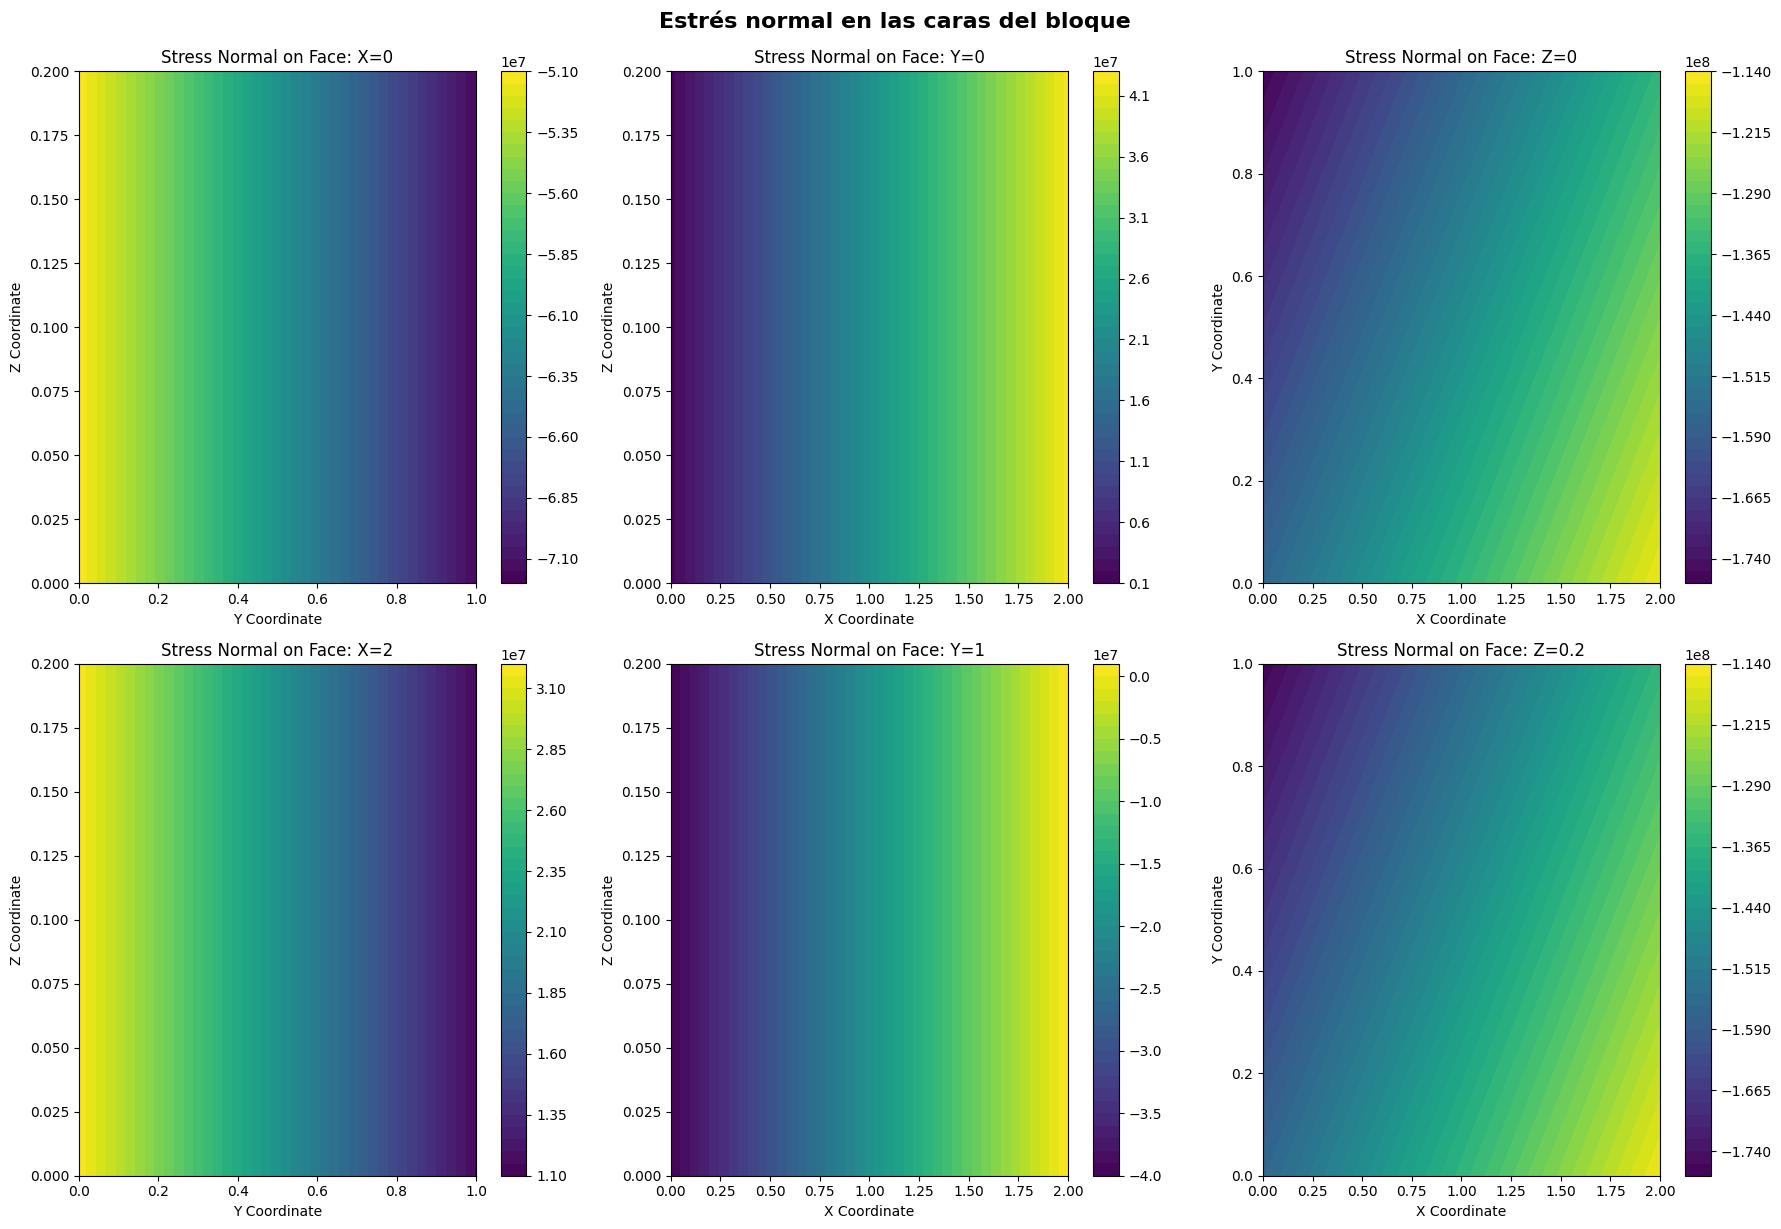

In [36]:
# Función para calcular el esfuerzo normal y generar el mapa de calor
def stress_normal_subplot(sigma, n_vector, x_range, y_range, const_value, subplot_pos, fixed_var):
    """
    Función que calcula el esfuerzo normal en una cara del bloque y grafica un mapa de calor.

    Parámetros:
    sigma (sympy.Matrix): Tensor de esfuerzos.
    n_vector (list): Vector normal a la cara.
    x_range (tuple): Rango de valores para la coordenada X.
    y_range (tuple): Rango de valores para la coordenada Y.
    const_value (float): Valor constante para la coordenada fija.
    subplot_pos (int): Posición del subplot en la figura.
    fixed_var (sympy.Symbol): Variable fija para la cara.
    """
    # Definicion del esfuerzo normal
    n = sp.Matrix(n_vector)
    t_n = sigma * n
    sigma_n = t_n.dot(n)
    # Variables para el gráfico
    x_var, y_var = {X, Y, Z} - {fixed_var}
    x_var, y_var = sorted([x_var, y_var], key=str)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    sigma_n_func = sp.lambdify((x_var, y_var), sigma_n.subs(fixed_var, const_value))
    
    # Crear un grid de valores para las variables libres
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    
    # Evaluar la función en el grid
    Sigma_n_vals = sigma_n_func(X_vals, Y_vals)
    
    # Crear un gráfico de contorno
    ax = plt.subplot(2, 3, subplot_pos)
    contour = ax.contourf(X_vals, Y_vals, Sigma_n_vals, levels=50, cmap='viridis')
    plt.colorbar(contour, ax=ax)
    ax.set_title(f"Stress Normal on Face: {fixed_var}={const_value}")
    ax.set_xlabel(f"{x_var} Coordinate")
    ax.set_ylabel(f"{y_var} Coordinate")

# Crear una figura grande para todos los subplots
plt.figure(figsize=(18, 12))

# Caras con X constante
stress_normal_subplot(stress_tensor, [-1, 0, 0], (0, 1), (0, 0.2), 0, 1, X)   # X = 0
stress_normal_subplot(stress_tensor, [1, 0, 0], (0, 1), (0, 0.2), 2, 4, X)    # X = 2

# Caras con Y constante
stress_normal_subplot(stress_tensor, [0, -1, 0], (0, 2), (0, 0.2), 0, 2, Y)   # Y = 0
stress_normal_subplot(stress_tensor, [0, 1, 0], (0, 2), (0, 0.2), 1, 5, Y)    # Y = 1

# Caras con Z constante
stress_normal_subplot(stress_tensor, [0, 0, -1], (0, 2), (0, 1), 0, 3, Z)     # Z = 0
stress_normal_subplot(stress_tensor, [0, 0, 1], (0, 2), (0, 1), 0.2, 6, Z)    # Z = 0.2

plt.tight_layout()
plt.suptitle("Estrés normal en las caras del bloque", y=1.02, fontsize=16, fontweight='bold')
plt.show()

En el gráfico hay varias cosas interesantes que podemos notar:

- El estrés es uniforme entre caras opuestas, osea que entre caras opuestas  el estrés normal se mantiene uniforme o con el mismo comportamiento aunque, esto nos indica que probablemente, el estrés se comporta uniformemente entre ambas caras opuestas, lo que concueda con los mapas para el estrés a través de todo el bloque donde la variación es pequeña.
 
- La cara XY es la que presenta un comportamiento un poco más curiosos ya que el estrés normal se comporta de manera que varia entre una esquina y otra uniformemente, a diferencia de las otras caras en las cuales varía entre dos aristas uniformemente

- Es importante notar que si bien el comportamiento es similar  entre caras opuestas, las magintudes y direcciones del estrés normal no son iguales, en concreto en las caras YZ la magnitud inversa lo que podría llevar a pensar que el vector de estrés normal asociado va en dirección contraría para ambas caras, pero en realidad van en el mismo sentido ya que como los vectores normales con los cuales fueron definidos son también contrarios lo que hace que al final los vectores normales de estrés vayan en la misma dirección, lo mismo aplica para las caras XZ, sin embargo, para la cara XY las magnitudes de ambas caras son iguales pero como el vector normal que las define va en dirección contrarias entonces estos estreses normales también van en dirección contraria.

Ahora para el vector de esfuerzo de cizalladura

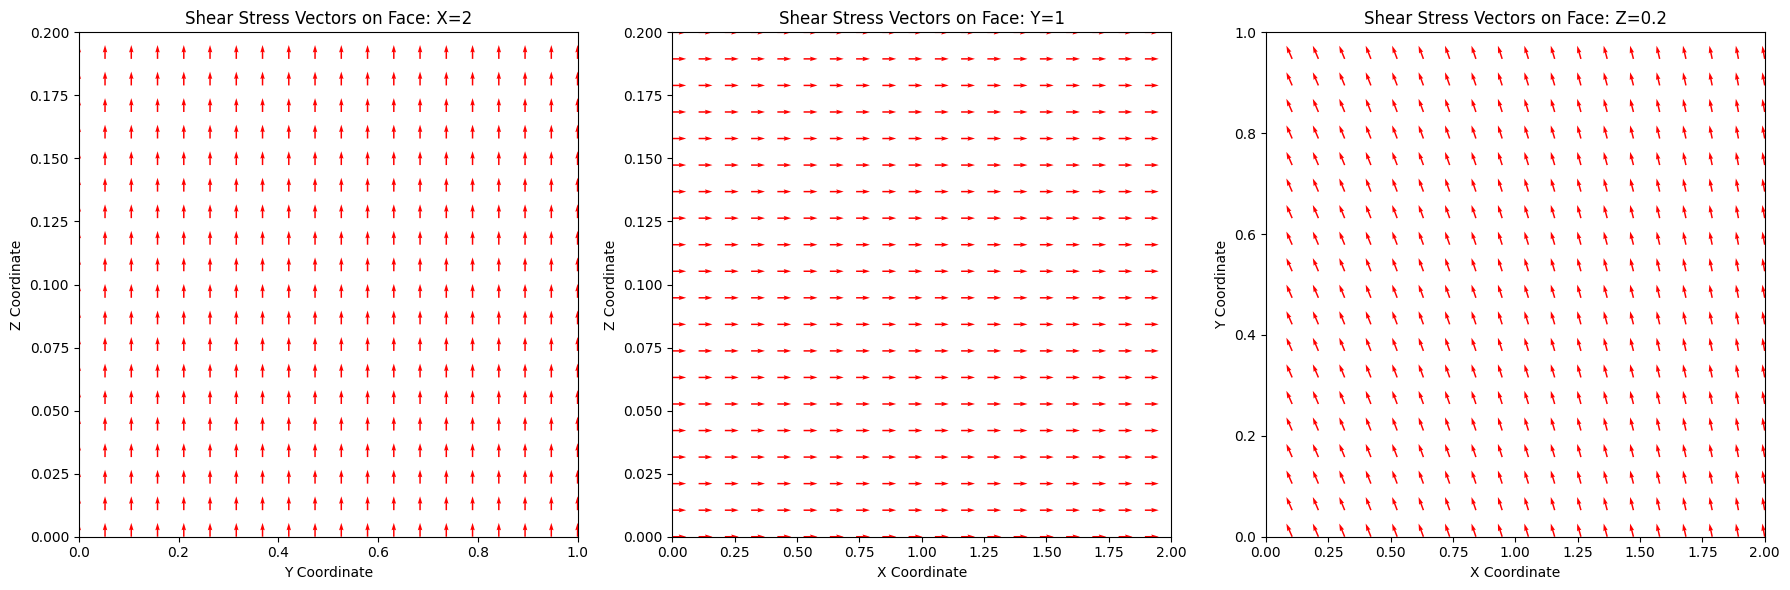

In [27]:
# Función para calcular el vector de esfuerzo de cizalladura y generar un mapa de campo vectorial
def shear_stress_vector_field(sigma, n_vector, x_range, y_range, const_value, subplot_pos, fixed_var):
    """
    
    Función que calcula el vector de esfuerzo de cizalladura en una cara dada y genera un mapa de campo vectorial.

    Parámetros:
    sigma (sympy.Matrix): Tensor de esfuerzos.
    n_vector (list): Vector normal a la cara.
    x_range (tuple): Rango de valores para la coordenada X.
    y_range (tuple): Rango de valores para la coordenada Y.
    const_value (float): Valor constante para la coordenada fija.
    subplot_pos (int): Posición del subplot en la figura.
    fixed_var (sympy.Symbol): Variable fija para la cara.


    """
    # Definir el vector normal a la cara
    n = sp.Matrix(n_vector)
    t_n = sigma * n
    sigma_n = t_n.dot(n)
    tau_n = t_n - sigma_n * n
    
    # Variables para el gráfico
    x_var, y_var = {X, Y, Z} - {fixed_var} # Eliminar la variable fija
    x_var, y_var = sorted([x_var, y_var], key=str)
    
    # Convertir las expresiones simbólicas a funciones numéricas
    tau_n_func_x = sp.lambdify((x_var, y_var), tau_n[0].subs(fixed_var, const_value))
    tau_n_func_y = sp.lambdify((x_var, y_var), tau_n[1].subs(fixed_var, const_value))
    tau_n_func_z = sp.lambdify((x_var, y_var), tau_n[2].subs(fixed_var, const_value))
    
    # Crear un grid de valores para las variables libres
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    
    # Evaluar las funciones en el grid
    Tau_n_vals_x = tau_n_func_x(X_vals, Y_vals)
    Tau_n_vals_y = tau_n_func_y(X_vals, Y_vals)
    Tau_n_vals_z = tau_n_func_z(X_vals, Y_vals)
    
    # Crear un mapa de campo vectorial
    ax = plt.subplot(1, 3, subplot_pos)
    ax.quiver(X_vals, Y_vals, Tau_n_vals_x, Tau_n_vals_y, color='r')
    ax.set_title(f"Shear Stress Vectors on Face: {fixed_var}={const_value}")
    ax.set_xlabel(f"{x_var} Coordinate")
    ax.set_ylabel(f"{y_var} Coordinate")
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

# Crear una figura grande para todos los subplots
plt.figure(figsize=(18, 6))

# Elegir tres caras: X=2, Y=1, Z=0.2
shear_stress_vector_field(stress_tensor, [1, 0, 0], (0, 1), (0, 0.2), 2, 1, X)   # X = 2
shear_stress_vector_field(stress_tensor, [0, 1, 0], (0, 2), (0, 0.2), 1, 2, Y)   # Y = 1
shear_stress_vector_field(stress_tensor, [0, 0, 1], (0, 2), (0, 1), 0.2, 3, Z)   # Z = 0.2

plt.tight_layout()
plt.show()

Este gráfico 

---
### Referencias

Para el desarrollo de algunas partes de este notebook, se utilizó ChatGPT, un modelo de lenguaje de OpenAI, como herramienta de asistencia. Las interacciones con ChatGPT ayudaron en la conceptualización, codificación y depuración de las secciones relevantes.